In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
to_cut=pd.read_csv('To_cut.csv')
to_cut=to_cut[to_cut['Index']<1462]
to_cut=to_cut.reset_index(drop=True)
r=to_cut['R_truc'].to_numpy()
bad=to_cut['Index'][np.where(r==0.0)[0]]
to_cut

,Index,R_truc,Vel
0,1,4.0,0.0
1,10,3.0,0.0
2,11,0.0,180.0
3,12,0.0,230.0
4,16,0.0,115.0
...,...,...,...
231,1454,20.0,NaN
232,1456,3.5,NaN
233,1457,10.0,NaN
234,1459,25.0,NaN


In [3]:
opt_data=pd.read_csv('Ropt_Mag_Mass.csv')
opt_data[0:5]

,Index,Name,Dist [kpc],Vopt_data [km/s],Vopt_fit [km/s],Ropt [kpc],Ropt_PROBES [kpc],Mag,x_shift,y_shift,R80_tag,R26_tag,Sel_tag
0,0,2MASSJ00385299-5529210,102518.858870,82.990974,89.263866,6.483,6.196825,-19.760055,-0.004140,-0.013201,1,1,1
1,1,2MASSJ10574998+0138550,157970.855085,73.673683,94.669024,7.505,7.316766,-19.836511,-0.054871,-1.766539,1,1,1
2,2,2MASSJ11000107+0137314,170587.533390,102.783713,108.480850,8.105,8.075045,-20.035916,0.067208,1.878760,1,1,1
3,5,2MASSJ23253174+1522128,146981.040664,105.987150,123.804256,8.450,8.222732,-19.079524,0.125195,3.377222,1,1,1
4,6,2MASSJ23542737-1023588,385474.778992,256.691099,235.965863,15.136,14.959321,-21.294982,-0.065389,0.960056,1,1,1


In [4]:
opt_data.columns

Index(['Index', 'Name', 'Dist [kpc]', 'Vopt_data [km/s] ', 'Vopt_fit [km/s] ',
       'Ropt [kpc]', 'Ropt_PROBES [kpc]', 'Mag', 'x_shift', 'y_shift',
       'R80_tag', 'R26_tag', 'Sel_tag'],
      dtype='object')

In [5]:
len(opt_data)

1462

## Homogeneise Errors

In [6]:
gal_to_exclude = [122, 161, 193, 222, 249, 254, 293, 302, 315, 326, 459, 482, 503, 507, 520, 529, 530, 562, 598, 675, 703, 710, 812, 826, 833, 835, 836, 842, 844, 860, 868, 950, 960, 965, 1028, 1025, 1051, 1082, 1083, 1089, 1093, 1183, 1188, 1218, 1222, 1243, 1244, 1264, 1269, 1299, 1305, 1312, 1320, 1324, 1332, 1374, 1385, 1386, 1427, 1428, 1432, 1438, 1442, 1449, 1458, 1462, 1465, 1481, 1517, 1523, 1527, 1528, 1549, 1574, 1586, 1594, 1637,
1655, 1656, 1669]
print(len(gal_to_exclude))
gal_to_exclude=np.unique(np.array(gal_to_exclude+list(bad)))
print(len(gal_to_exclude))
opt_data=opt_data[~opt_data['Index'].isin(gal_to_exclude)]
len(opt_data)

80
108


1357

In [7]:
opt_data=opt_data.reset_index(drop=True)
opt_data[0:20]

,Index,Name,Dist [kpc],Vopt_data [km/s],Vopt_fit [km/s],Ropt [kpc],Ropt_PROBES [kpc],Mag,x_shift,y_shift,R80_tag,R26_tag,Sel_tag
0,0,2MASSJ00385299-5529210,102518.858870,82.990974,89.263866,6.483,6.196825,-19.760055,-0.004140,-0.013201,1,1,1
1,1,2MASSJ10574998+0138550,157970.855085,73.673683,94.669024,7.505,7.316766,-19.836511,-0.054871,-1.766539,1,1,1
2,2,2MASSJ11000107+0137314,170587.533390,102.783713,108.480850,8.105,8.075045,-20.035916,0.067208,1.878760,1,1,1
3,5,2MASSJ23253174+1522128,146981.040664,105.987150,123.804256,8.450,8.222732,-19.079524,0.125195,3.377222,1,1,1
4,6,2MASSJ23542737-1023588,385474.778992,256.691099,235.965863,15.136,14.959321,-21.294982,-0.065389,0.960056,1,1,1
5,7,2MASXJ00585745-0039197,307329.227676,205.383019,198.306779,17.668,16.273904,-21.443132,0.015180,-0.314449,1,1,1
6,8,2MASXJ01131189+1505583,173667.194245,173.606105,179.891215,9.984,8.975075,-20.476839,-0.069185,-3.003277,1,1,1
7,9,2MASXJ01133756+0025256,174156.421237,164.904705,154.033212,8.274,8.226839,-19.726123,-0.196176,-1.329814,1,1,1
8,10,2MASXJ01154476+0019595,162281.077727,123.578608,138.598038,7.009,7.197857,-20.294166,0.202649,7.472757,1,1,1
9,13,2MASXJ01180192+0018525,149699.846487,127.783939,132.175420,7.824,7.432616,-20.324395,-0.086390,-1.843941,1,1,1


In [8]:
gal_to_exclude

array([  11,   12,   16,   31,   44,   50,   72,   92,  101,  121,  122,
        137,  138,  155,  158,  161,  167,  193,  200,  222,  224,  225,
        249,  254,  270,  281,  293,  302,  310,  315,  326,  459,  470,
        482,  496,  503,  507,  520,  524,  529,  530,  562,  590,  591,
        598,  605,  618,  675,  703,  710,  812,  826,  833,  835,  836,
        842,  844,  860,  868,  950,  960,  965, 1025, 1028, 1051, 1082,
       1083, 1089, 1093, 1183, 1188, 1218, 1222, 1243, 1244, 1264, 1269,
       1299, 1305, 1312, 1320, 1324, 1332, 1374, 1385, 1386, 1427, 1428,
       1432, 1438, 1442, 1449, 1458, 1462, 1465, 1481, 1517, 1523, 1527,
       1528, 1549, 1574, 1586, 1594, 1637, 1655, 1656, 1669])

In [9]:
gal_to_exclude=gal_to_exclude[gal_to_exclude<1462]

In [10]:
vopts=[]
import warnings
warnings.filterwarnings("ignore")


for i in range(len(opt_data)):
    
    rcurve=pd.read_csv('Rot_curves/'+opt_data['Name'][i]+'_RC_corr.txt',delimiter=' ')
    rcurve.columns=['R[Kpc]', 'V[Km/s]', 'V_err[km/s]','R_shifted', 'V_shifted','hi']
    rcurve.drop('hi',axis=1)

    j=opt_data['Index'][i]

    if (j in to_cut['Index'].to_numpy()) & (j not in gal_to_exclude):
        pos=np.where(to_cut['Index']==j)[0][0]
    
    rc_r= np.abs(pd.to_numeric(rcurve['R_shifted'][1:]).to_numpy())

    if (j in to_cut['Index'].to_numpy()) & ((j not in gal_to_exclude)):
        ind=rc_r<=to_cut['R_truc'][pos]
        rc_r=rc_r[ind]
           
    ropt=opt_data['Ropt [kpc]'][i]
    rc_r=rc_r/ropt
    
    rc_v=np.abs(pd.to_numeric(rcurve['V_shifted'][1:]).to_numpy())
    if (j in to_cut['Index'].to_numpy()) & ((j not in gal_to_exclude)):
        rc_v=rc_v[ind]

    p1=np.where(rc_r>1.5)
    p2=np.where(rc_r<1.5)

    rc_r_1=rc_r[p2]
    rc_v_1=rc_v[p2]
    #rc_err_1=rc_err[p2]

    rc_r_2=rc_r[p1]
    rc_v_2=rc_v[p1]
    #rc_err_2=rc_err[p1]

    #Create bins containing equal data points and assign values
    try:
        qs=pd.qcut(rc_r_1,q=20)
    except: 
        print(i)
        continue

    qs2=qs.unique()
    df2 = pd.DataFrame({'r': rc_r_1, 'v':rc_v_1, 'Quantile': qs})
    binned=[df2[df2['Quantile']==q] for q in qs2]

    '''
    qs=pd.qcut(rc_r_2,q=1)
    qs2=qs.unique()
    df2 = pd.DataFrame({'r': rc_r_2, 'v':rc_v_2, 'Quantile': qs})
    binned2=[df2[df2['Quantile']==q] for q in qs2]
    '''
    binned2=[]
    

    binned=binned+binned2
    
    xplot=[]
    yplot=[]
    dyplot=[]
    ls=[]
    
    for binn in binned:
        
        x= pd.to_numeric(binn['r']).to_numpy()
        y= pd.to_numeric(binn['v']).to_numpy()
        #dy= pd.to_numeric(binn['dv']).to_numpy()
        
        
        xval=0.5*(min(x)+max(x))
        yval=np.average(y)
        dyval=np.sqrt((np.sum((y-yval)**2))/(len(x)-1)/(len(x)))

        ls.append(len(x))
        
        xplot.append(xval)
        yplot.append(yval)
        dyplot.append(dyval)

    xplot=np.array(xplot)
    yplot=np.array(yplot)
    dyplot=np.array(dyplot)


    v=yplot[np.argmin((xplot-1)**2)]
    a=opt_data['Vopt_fit [km/s] '][i]
    b=opt_data['Vopt_data [km/s] '][i]

    if (v-a)**2>(v-b)**2:
        vopt=b
    else:
        vopt=a 

    vopts.append(vopt)
    
    
    #dffin=pd.DataFrame({'r':xplot[xplot<1.5],'v':yplot[xplot<1.5],'err':dyplot[xplot<1.5]})
    #dffin=pd.DataFrame({'r':xplot,'v':yplot,'err':dyplot})
    #dffin.to_csv('{mini}<$V_opt$<{maxi}_newest_filtered.csv'.format(mini=np.round(upper[i],2),maxi=np.round(lower[i],2)),mode='w', header=True)

    '''
    if i<5:
        
        fig,ax=plt.subplots(figsize=(5,4))
        plt.scatter(rc_r_1,rc_v_1,color='black',s=0.1,alpha=0.8)
        plt.scatter(xplot,yplot, color='black')
    #plt.errorbar(xplot[xplot<1.5],yplot[xplot<1.5],dyplot[xplot<1.5],fmt='.',elinewidth=3,markerfacecolor='green', markeredgecolor='black', ecolor='green',color='black',capsize=4,label='Binned RCs')
    #plt.errorbar(xplot,yplot,dyplot,fmt='.',elinewidth=3,markersize=15,markerfacecolor='yellow', markeredgecolor='black', ecolor='yellow',color='black',capsize=4,label='Binned RCs')
    #plt.ylim(0,2)
    #plt.title('{}'.format(np.round(upper[i],2))+'$<V_{opt}<$'+'{}'.format(np.round(lower[i],2)))
    
    #if i!=7:
        #plt.text(x=min(xplot)+0.05,y=max(yplot)-0.05,s='N={}'.format(bb[i]),fontsize=12)
        
    #else:
        #plt.text(x=min(xplot)+0.05,y=max(yplot)-0.05,s='N=174',fontsize=12)
        
        plt.xlabel('$R/R_{opt}$',fontsize=14,fontweight='bold')
        plt.ylabel('$V$',fontsize=14,fontweight='bold')
        plt.axvline(1)
        plt.axhline(1)
        ax.spines['top'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['right'].set_linewidth(1.5)
    #plt.legend(frameon=False)
        plt.show()
    '''

814
969
1006


In [11]:
opt_data=opt_data.drop(index=[814,969,1006])

In [12]:
opt_data=opt_data.reset_index(drop=True)

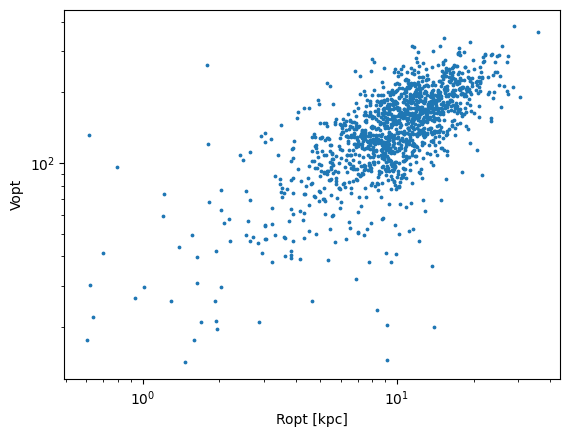

In [13]:
plt.scatter(opt_data['Ropt [kpc]'],vopts,s=3)
plt.xlabel('Ropt [kpc]')
plt.ylabel('Vopt')
plt.xscale('log')
plt.yscale('log')

In [14]:
len(vopts)

1354

In [15]:
for i in range(len(opt_data)):
    
    j=opt_data['Index'][i]

    if (j in to_cut['Index'].to_numpy()) & (j not in gal_to_exclude):
        pos=np.where(to_cut['Index']==j)[0][0]
        
    rcurve=pd.read_csv('Rot_curves/'+opt_data['Name'][i]+'_RC_corr.txt',delimiter=' ')
    rcurve.columns=['R[Kpc]', 'V[Km/s]', 'V_err[km/s]','R_shifted', 'V_shifted','hi']
    rcurve.drop('hi',axis=1)
    
    rc_r= np.abs(pd.to_numeric(rcurve['R_shifted'][1:]).to_numpy())

    if (j in to_cut['Index'].to_numpy()) & ((j not in gal_to_exclude)):
        ind=rc_r<=to_cut['R_truc'][pos]
        rc_r=rc_r[ind]
    
    ropt=opt_data['Ropt [kpc]'][i]
    rc_r=rc_r/ropt
    
    rc_v=np.abs(pd.to_numeric(rcurve['V_shifted'][1:]).to_numpy())

    if (j in to_cut['Index'].to_numpy()) & ((j not in gal_to_exclude)):
        rc_v=rc_v[ind]

    '''
    a=opt_data['Vopt_fit [km/s] '][i]
    b=opt_data['Vopt_data [km/s] '][i]
    v=rc_v[np.argmin((rc_r-1)**2)]
    if (v-a)**2>(v-b)**2:
        vopt=b
    else:
        vopt=a
        

    news.append(vopt)
    '''
    
    rc_v=rc_v/vopts[i]
    
    rc_dv=pd.to_numeric(rcurve['V_err[km/s]'][1:]).to_numpy()

    if (j in to_cut['Index'].to_numpy()) & ((j not in gal_to_exclude)):
        rc_dv=rc_dv[ind]
        
    rc_dv=rc_dv/vopt
    
    less=rc_dv<0.02*rc_v
    rc_dv[less]=0.02*rc_v[less]
    
    df=pd.DataFrame({'r':rc_r,'v':rc_v,'err':rc_dv})

    df.to_csv(opt_data['Name'][i]+'_rc.csv',mode='w', header=True)

In [16]:
bins = []
num_bins = 11
data_points_per_bin = (len(opt_data)) // num_bins
bins = [opt_data['Name'][_ * data_points_per_bin: (_+1)*data_points_per_bin] for _ in range(num_bins)]

print(len(opt_data))
bb=np.array([len(i) for i in bins])
print(np.sum(bb))

1354
1352


In [17]:
data_points_per_bin

169

In [18]:
bins[-1]=pd.concat([bins[-1], pd.Series([opt_data['Name'][1352], 
                                         opt_data['Name'][1353],
                                        ],index=[1352,1353])])
bins[-1]

1183                    UGC12133
1184                    UGC12172
1185                    UGC12200
1186                    UGC12234
1187                    UGC12290
                  ...           
1349    WISEAJ234730.01+090901.0
1350    WISEAJ235258.55-104111.6
1351    WISEAJ235404.66-102550.2
1352    WISEAJ235444.19-101655.7
1353    WISEAJ235516.75-104608.1
Length: 171, dtype: object

## Vopt bins

In [19]:
#vopt=pd.to_numeric(opt_data['Vopt_data [km/s] ']).to_numpy()
ropt=pd.to_numeric(opt_data['Ropt [kpc]']).to_numpy()
mag=pd.to_numeric(opt_data['Mag']).to_numpy()

files=[opt_data['Name'][i]+'_rc.csv' for i in range(len(opt_data)) if i not in gal_to_exclude]
log_vopt=np.log10(vopts)

print(log_vopt.min(),log_vopt.max())
print(np.sum([len(i) for i in bins]))

1.1512780083894627 2.58230107566365
1354


In [20]:
len(vopts)

1354

In [21]:
'''
data=[[] for i in range(8)]

df2=pd.DataFrame({'Name':opt_data['Name'],'vopt':vopts, 'ropt':opt_data['Ropt [kpc]']})
df2=df2.sort_values(by=['vopt'])
data[0]=df2[0:169]
data[1]=df2[169:338]
data[2]=df2[338:507]
data[3]=df2[507:676]
data[4]=df2[676:845]
data[5]=df2[845:1014]
data[6]=df2[1014:1183]
data[7]=df2[1183:]


for i in range(8):
    selected_data = [item for item in data[i]['Name']]
    dfs = [pd.read_csv(f'{name}_rc.csv') for name in selected_data]
    concatenated_df = pd.concat(dfs, axis=0)
    concatenated_df.to_csv(f'log_vopt_binned_{i}.csv', header=True, mode='w')
'''

"\ndata=[[] for i in range(8)]\n\ndf2=pd.DataFrame({'Name':opt_data['Name'],'vopt':vopts, 'ropt':opt_data['Ropt [kpc]']})\ndf2=df2.sort_values(by=['vopt'])\ndata[0]=df2[0:169]\ndata[1]=df2[169:338]\ndata[2]=df2[338:507]\ndata[3]=df2[507:676]\ndata[4]=df2[676:845]\ndata[5]=df2[845:1014]\ndata[6]=df2[1014:1183]\ndata[7]=df2[1183:]\n\n\nfor i in range(8):\n    selected_data = [item for item in data[i]['Name']]\n    dfs = [pd.read_csv(f'{name}_rc.csv') for name in selected_data]\n    concatenated_df = pd.concat(dfs, axis=0)\n    concatenated_df.to_csv(f'log_vopt_binned_{i}.csv', header=True, mode='w')\n"

In [22]:
data=[[] for i in range(11)]

df2=pd.DataFrame({'Name':opt_data['Name'],'vopt':vopts, 'ropt':opt_data['Ropt [kpc]']})
df2=df2.sort_values(by=['vopt'])
data[0]=df2[0:56]
data[1]=df2[56:112]
data[2]=df2[112:169]
data[3]=df2[169:338]
data[4]=df2[338:507]
data[5]=df2[507:676]
data[6]=df2[676:845]
data[7]=df2[845:1014]
data[8]=df2[1014:1183]
data[9]=df2[1183:1268]
data[10]=df2[1268:]


for i in range(11):
    selected_data = [item for item in data[i]['Name']]
    dfs = [pd.read_csv(f'{name}_rc.csv') for name in selected_data]
    concatenated_df = pd.concat(dfs, axis=0)
    concatenated_df.to_csv(f'log_vopt_binned_{i}.csv', header=True, mode='w')

In [33]:
bb=[]
for i in data:
    print(len(i))
    bb.append(len(i))

56
56
57
169
169
169
169
169
169
85
86


In [34]:
sum(bb)

1354

In [35]:
lower=[]
upper=[]

for i in range(11):
    upper.append(data[i]['vopt'].min())
    lower.append(data[i]['vopt'].max())
    print(data[i]['vopt'].min(),data[i]['vopt'].max())

14.167003734595047 49.62935953357682
49.97431073395482 71.87020751200633
72.5 85.17038192052048
85.37130446247137 109.36090880673645
109.95423178063167 127.87010315187942
127.91254205765507 145.67784796135706
145.77170400057338 164.99274254053182
165.18851518584236 184.52092101607988
184.56223929982696 212.21357884061808
212.43045841039816 237.1982529928589
238.10501932033685 382.20914639983226


In [24]:
bin_avg_v=[]
bin_avg_r=[]

for i in range(11):
    bin_avg_v.append(np.mean(data[i]['vopt']))
    bin_avg_r.append(np.mean(data[i]['ropt']))
    
print(bin_avg_v)
print(bin_avg_r)

[36.259482451107274, 61.5834661478677, 79.73556051877897, 98.09412632855788, 119.46049589287385, 136.04621974728303, 155.66264931242966, 174.59799041185326, 197.45748252130463, 223.63149004725904, 268.3698612341104]
[4.225303571428571, 6.274089285714285, 6.30677192982456, 8.194017751479292, 9.08096449704142, 9.937727810650888, 10.952810650887574, 12.265952662721894, 13.970473372781063, 15.433858823529414, 16.497232558139537]


In [25]:
np.round(bin_avg_r,2)

array([ 4.23,  6.27,  6.31,  8.19,  9.08,  9.94, 10.95, 12.27, 13.97,
       15.43, 16.5 ])

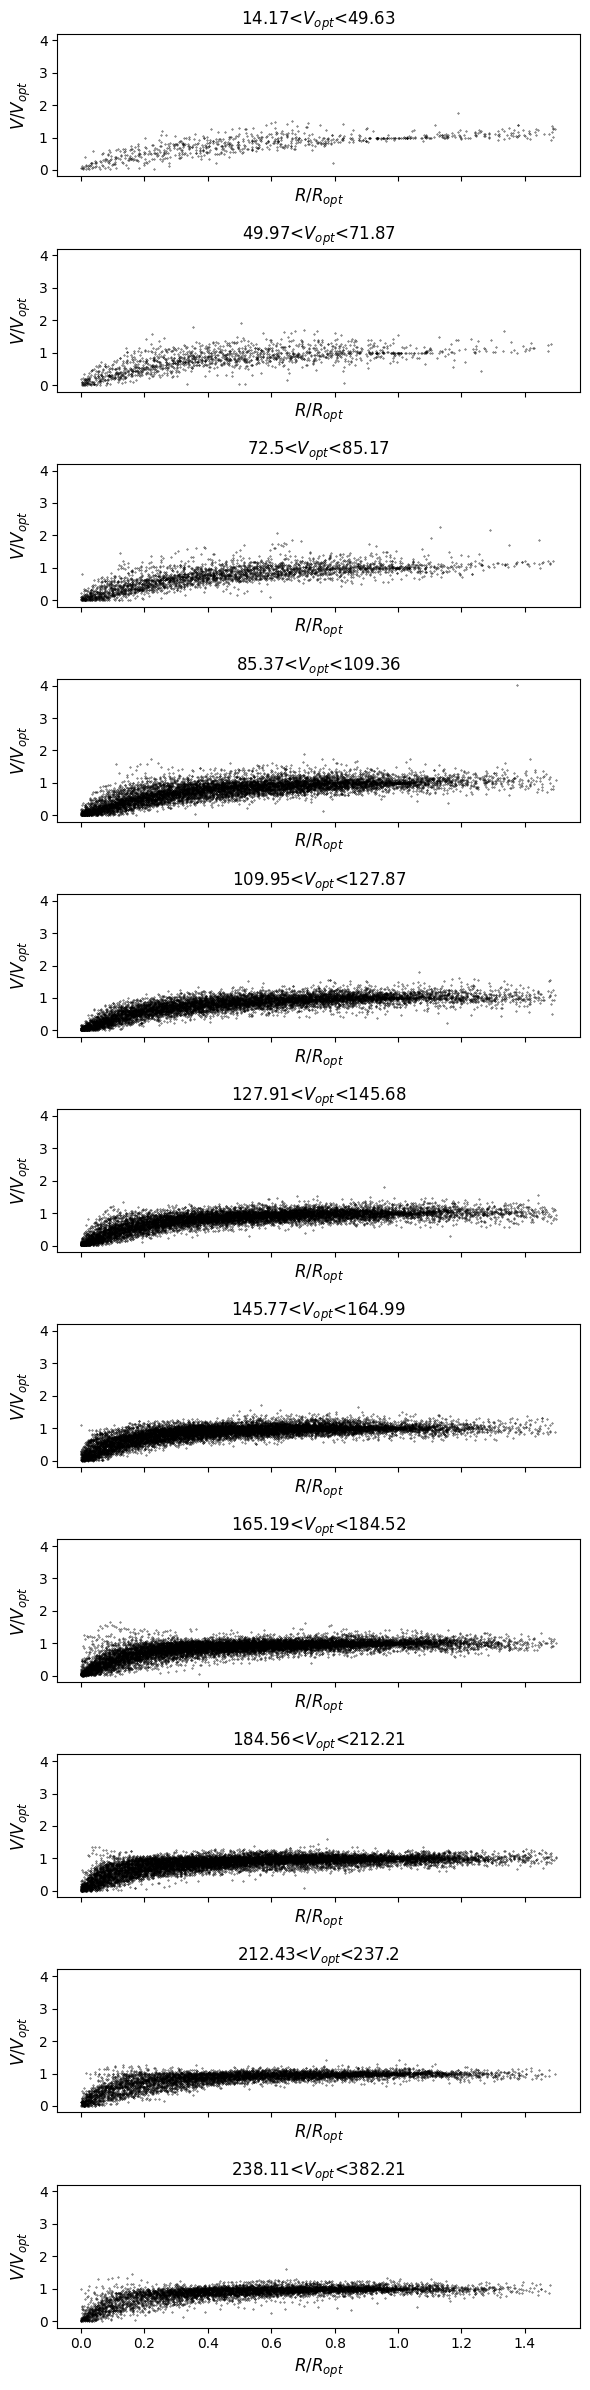

In [26]:
fig,ax=plt.subplots(11,figsize=(6,24),sharex=True,sharey=True)
for i in range(11):
    
    df=pd.read_csv('log_vopt_binned_{}.csv'.format(i))
    
    rc_r= pd.to_numeric(df['r']).to_numpy()
    less=rc_r<1.5
    #rc_r=rc_r[less]
    
    rc_v= pd.to_numeric(df['v']).to_numpy()
    #rc_v=rc_v[less]
    
    rc_err= pd.to_numeric(df['err']).to_numpy()
    #rc_err=rc_err[less]
       
    #ax[i].errorbar(rc_r,rc_v,np.abs(rc_err),fmt='.',color='black',capsize=2)
    ax[i].scatter(rc_r[less],rc_v[less],color='black',s=0.1)
    ax[i].set_xlabel('$R/R_{opt}$',fontsize='large')
    ax[i].set_ylabel('$V/V_{opt}$',fontsize='large')
    ax[i].set_title('{}'.format(np.round(upper[i],2))+'<$V_{opt}$<'+'{}'.format(np.round(lower[i],2)),fontsize='large')

plt.tight_layout()
plt.show()

## Radial Bins

In [31]:
a= [0.0433, 0.0433, 0.0433,0.0433,0.0433,0.0435, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.0733,0.0733,0.0734]
j=0
b=[0]
for i in a:
    print(j+i)
    j=j+i
    b.append(j)
print(b)

0.0433
0.0866
0.1299
0.1732
0.2165
0.26
0.33
0.4
0.48000000000000004
0.56
0.64
0.72
0.8099999999999999
0.8999999999999999
0.9899999999999999
1.0799999999999998
1.17
1.2432999999999998
1.3165999999999998
1.3899999999999997
[0, 0.0433, 0.0866, 0.1299, 0.1732, 0.2165, 0.26, 0.33, 0.4, 0.48000000000000004, 0.56, 0.64, 0.72, 0.8099999999999999, 0.8999999999999999, 0.9899999999999999, 1.0799999999999998, 1.17, 1.2432999999999998, 1.3165999999999998, 1.3899999999999997]


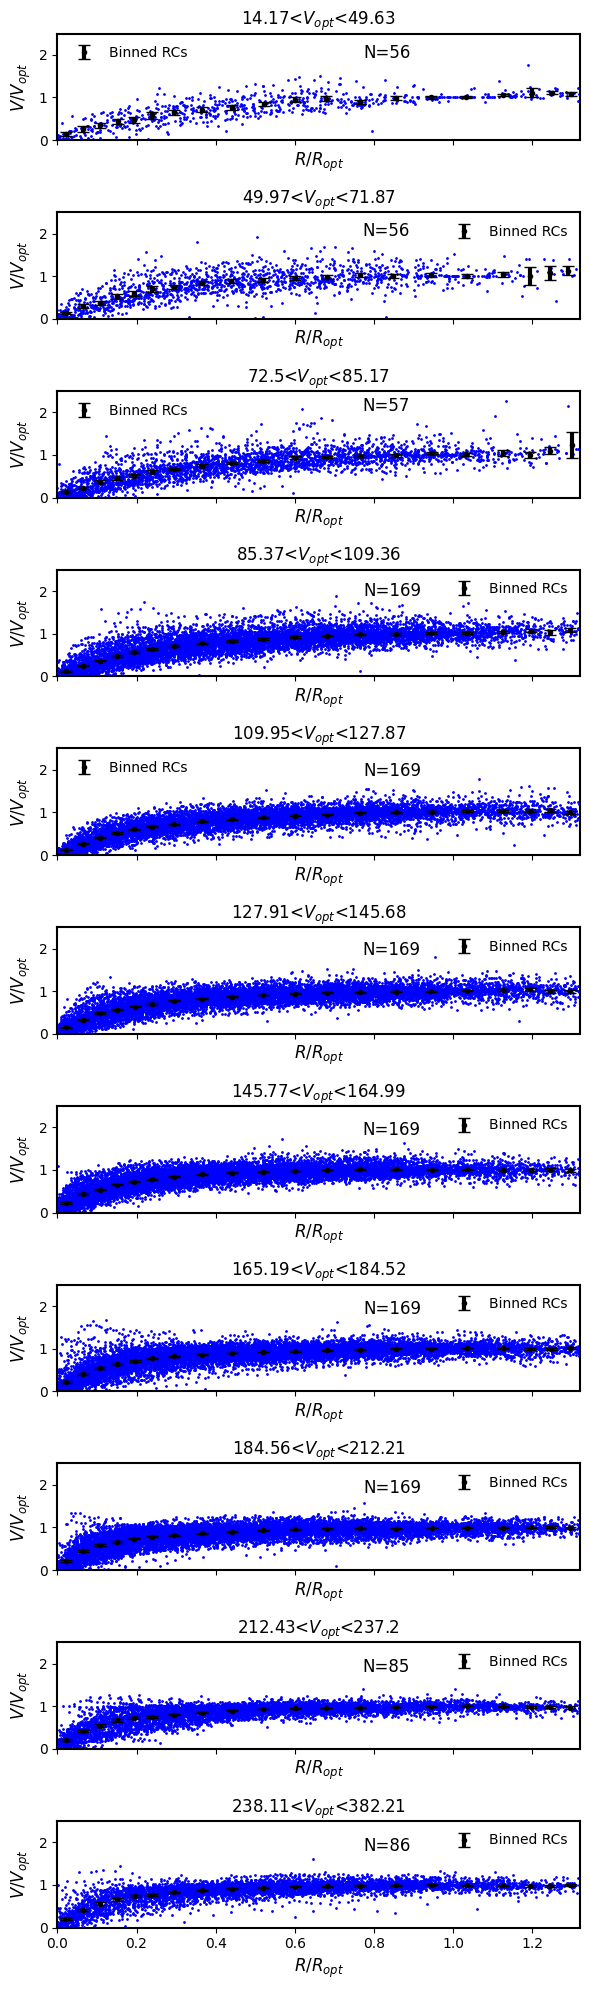

In [40]:
fig,ax=plt.subplots(11,figsize=(6,20),sharex=True,sharey=True)

for i in range(11):

    df2=pd.read_csv('log_vopt_binned_{}.csv'.format(i))
    
    bin_sizes = [0.0433, 0.0433, 0.0433,0.0433,0.0433,0.0435, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.05,0.05,0.05]
    bins=[0,0.0433,0.0866,0.1299,0.1732,0.2165,0.26,0.33,0.4,0.48,0.56,0.64,0.72,0.81,0.90,0.99,1.08,1.17,1.22,1.27,1.32]
    
    b = np.digitize(df2['r'], bins)
    binned_data={bin_start:[] for bin_start in bins[0:-1]}

    for j, bin_start in enumerate(bins[0:]):
        mask=b==j+1
        binned_data[bin_start]=np.array(list(zip(df2['r'][mask], df2['v'][mask], df2['err'][mask])))

    xplot=[]
    yplot=[]
    dyplot=[]
    
    for bin_start in bins[0:-1]:

        d=binned_data[bin_start]
        
        x=d[:,0]
        y=d[:,1]
        
        xval=0.5*(min(x)+max(x))
        yval=np.average(y)
        dyval=np.sqrt((np.sum((y-yval)**2))/(len(x)-1)/(len(x)))
        
        xplot.append(xval)
        yplot.append(yval)
        dyplot.append(dyval)

    xplot=np.array(xplot)
    yplot=np.array(yplot)
    dyplot=np.array(dyplot)

    dffin=pd.DataFrame({'r':xplot,'v':yplot,'err':dyplot})
    dffin.to_csv('{mini}<$V_opt$<{maxi}_2210.csv'.format(mini=np.round(upper[i],2),maxi=np.round(lower[i],2)),mode='w', header=True)

    #plt.errorbar(xplot[xplot<1.5],yplot[xplot<1.5],dyplot[xplot<1.5],fmt='.',elinewidth=3,markerfacecolor='green', markeredgecolor='black', ecolor='green',color='black',capsize=4,label='Binned RCs')
    ax[i].errorbar(xplot,yplot,2*dyplot,fmt='.',elinewidth=3,markerfacecolor='black', markeredgecolor='black', ecolor='black',color='black',capsize=4,label='Binned RCs')
    ax[i].scatter(df2['r'],df2['v'],s=1,color='blue')
    ax[i].set_xlabel('$R/R_{opt}$',fontsize='large')
    ax[i].set_ylabel('$V/V_{opt}$',fontsize='large')
    ax[i].set_ylim(0,2.5)
    ax[i].set_xlim(0,1.32)
    
    #plt.title('{}'.format(np.round(upper[i],2))+'$<V_{opt}<$'+'{}'.format(np.round(lower[i],2)))
    ax[i].text(x=min(xplot)+0.75,y=max(yplot)+0.8,s='N={}'.format(bb[i]),fontsize=12)
    ax[i].set_title('{}'.format(np.round(upper[i],2))+'<$V_{opt}$<'+'{}'.format(np.round(lower[i],2)),fontsize='large')
        
    ax[i].spines['top'].set_linewidth(1.5)
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].spines['right'].set_linewidth(1.5)
    ax[i].legend(frameon=False)

plt.tight_layout()
plt.savefig('URC.png')
plt.show()

In [43]:
bb

[56, 56, 57, 169, 169, 169, 169, 169, 169, 85, 86]